📦 Product Sales Summary:
         product  total_qty  revenue
0   Laptop Stand          2   1700.0
1     Headphones          3   1350.0
2     Whiteboard          1   1200.0
3      USB Cable         10   1200.0
4      Desk Lamp          2    600.0
5      Mouse Pad          6    450.0
6        Stapler          4    240.0
7   Water Bottle          8    120.0
8  Printer Paper         20     50.0
9   Sticky Notes         25     37.5


<Figure size 1000x600 with 0 Axes>

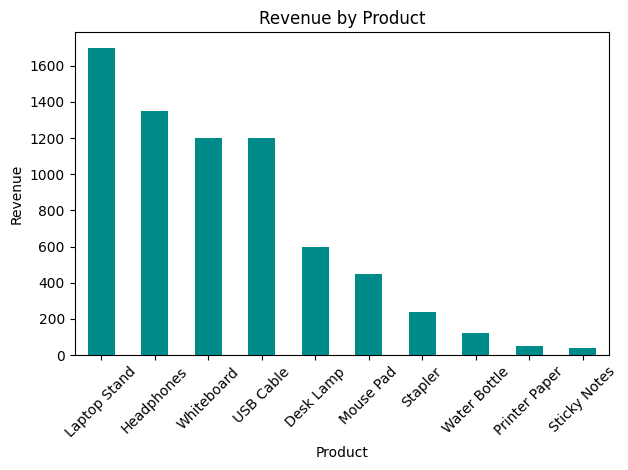

In [1]:
# 📊 Task 7 — Sales Summary Using New Dataset

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import os

# Step 1: Connect to or create SQLite database
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

# Step 2: Create the sales table (if it doesn't exist)
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Step 3: Clear previous data (optional: reset for new dataset)
cursor.execute("DELETE FROM sales")

# Step 4: Insert new sample dataset
new_data = [
    ('Water Bottle', 8, 15.0),
    ('Stapler', 4, 60.0),
    ('Desk Lamp', 2, 300.0),
    ('Whiteboard', 1, 1200.0),
    ('Printer Paper', 20, 2.5),
    ('Sticky Notes', 25, 1.5),
    ('Mouse Pad', 6, 75.0),
    ('USB Cable', 10, 120.0),
    ('Headphones', 3, 450.0),
    ('Laptop Stand', 2, 850.0)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", new_data)
conn.commit()

# Step 5: Run SQL query to calculate total quantity and revenue
query = """
SELECT 
    product,
    SUM(quantity) AS total_qty,
    ROUND(SUM(quantity * price), 2) AS revenue
FROM sales
GROUP BY product
ORDER BY revenue DESC
"""
df = pd.read_sql_query(query, conn)

# Step 6: Display output
print("📦 Product Sales Summary:")
print(df)

# Step 7: Plot revenue as bar chart
plt.figure(figsize=(10, 6))
df.plot(kind='bar', x='product', y='revenue', color='darkcyan', legend=False)
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()

# Step 8: Close connection
conn.close()
